PCA [0.005 0.002 0.261 0.173 0.587]
MDS [0.004 0.001 0.111 0.092 0.238]
ISOMAP [0.005 0.004 0.258 0.168 0.793]
TSNE [0.01  0.001 0.381 0.242 0.808]
UMAP [0.006 0.001 0.302 0.194 0.783]
PHATE [0.005 0.001 0.303 0.191 0.766]


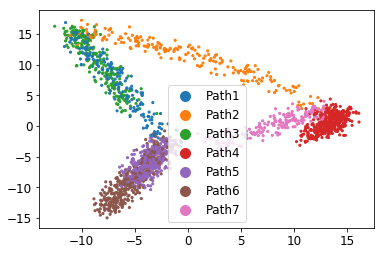

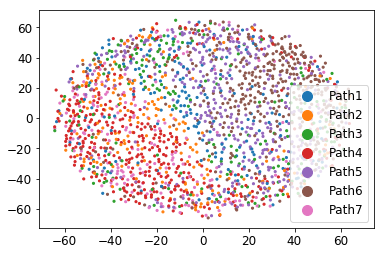

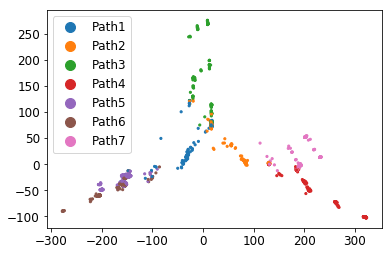

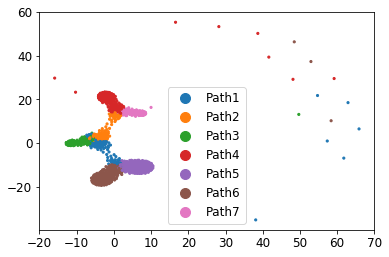

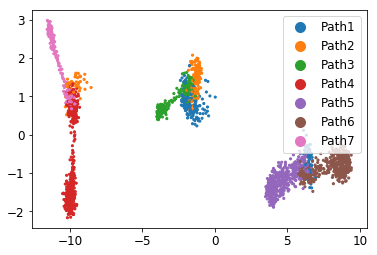

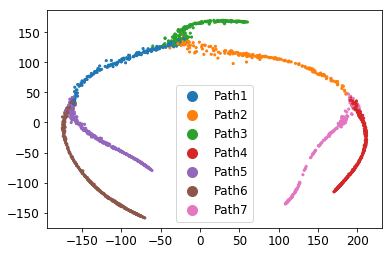

In [3]:
import sys
sys.path.append("..")

import scprep
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from blog_tools import data, quantify, embed
%matplotlib inline

dataset = data.trajectory(size=2000, seed=45, dropout_prob=0.8)

algorithms = embed.__all__
X_true = scprep.reduce.pca(dataset.X_true, 100)

for algorithm in algorithms:
    Y = algorithm(dataset.X)[:,:2]
    scprep.plot.scatter2d(Y, dataset.c)
    onenn = quantify.shared_neighbors(dataset.X, Y, knn=2)
    onenn_true = quantify.shared_neighbors(dataset.X_true, Y, knn=2)
    auc = quantify.shared_neighbors_AUC(dataset.X, Y)
    auc_true = quantify.shared_neighbors_AUC(dataset.X_true, Y)
    demap = quantify.DEMaP(X_true, Y)
    print(algorithm.__name__, np.array([onenn, onenn_true, auc, auc_true, demap]))